In [39]:
import pandas as pd
import numpy as np

In [40]:
path = r"C:\Users\Harujah\Desktop\Pantech_Courses\ML\ML_Projects\datasets\salary.csv"
df = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Harujah\\Desktop\\Pantech_Courses\\ML\\ML_Projects\\dataset\\salary.csv'

In [ ]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K
8,68,9,0,40,<=50K
9,41,10,0,60,>50K


In [ ]:
print(df.shape)


(32561, 5)


Mapping to binary value"

In [ ]:
income_set = set(df["income"])
df["income"] = df["income"].map({'<=50K': 0,'>50K': 1}).astype(int)
print(df.head(5))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
Y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
X_test

array([[ 1.28021187, -1.95076313, -0.14862056, -0.02410276],
       [-1.43776822, -0.40217459, -0.14862056, -1.23335031],
       [-1.14393254, -0.01502745, -0.14862056, -0.42718528],
       ...,
       [ 0.39870482, -0.01502745, -0.14862056,  1.18514479],
       [ 1.42712972, -0.40217459, -0.14862056,  0.78206227],
       [ 1.20675295, -0.01502745, -0.14862056,  0.37897976]])

In [ ]:
X_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

Finding the best K Value

Text(0, 0.5, 'Mean Error')

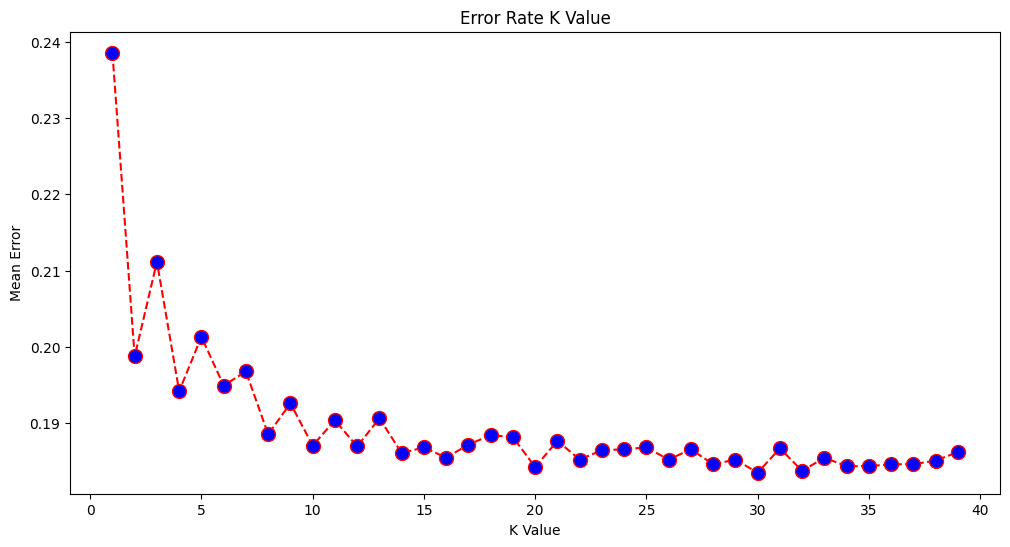

In [ ]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculating error for K values between 1-40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

#Plotting K in graph
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle = 'dashed', marker = 'o', markerfacecolor ='blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20, metric= 'minkowski', p = 2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
Y_Predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Predict)
print(accuracy_score(Y_test, Y_Predict)*100)

81.57474511730746


Testing The Model with user input

In [ ]:
age = int(input("Enter the age: "))
edu = int(input("Enter the education: "))
cap = int(input("Enter the capitalGain: "))
wh = int(input("Enter the workingHour: "))
newEmp = [[age,edu,cap,wh]]
results = model.predict(sc.transform(newEmp))
print(results)

if results == 1:
    print("The employee might not get the salary above 50k")

else:
    print("The employee might get the salary above 50k")

[0]
The employee might get the salary above 50k
